In [2]:
import matplotlib.pyplot as plt

class levenshteinComps():
    def __init__(self):
        self.comps=0

    def levenshtein(self, string1, string2):
        self.comps=0
        return self.levenshteinHelper(string1, string2)
    
    
    def levenshteinHelper(self, string1, string2):
        self.comps+=1
        if len(string1)==0:
            return len(string2)
        self.comps+=1
        if len(string2)==0:
            return len(string1)
        firstHead=string1[0]
        secondHead=string2[0]
        firstTail=string1[1:]
        secondTail=string2[1:]
        firstLargerTail=string1[1:]
        self.comps+=1
        if firstHead==secondHead:

            return self.levenshteinHelper(firstTail,secondTail)

        else:
            firstOption=self.levenshteinHelper(firstTail, string2)
            secondOption=self.levenshteinHelper(firstTail,secondTail)
            thirdOption=self.levenshteinHelper(string1,secondTail)
            fourthOption=1000000
            self.comps+=5
            if len(string1)>1 and len(string2)>1 and string1[0]==string2[1] and string1[1]==string2[0] and string1[0]!=string2[0]:
                firstSmallerTail=string1[2:]
                secondSmallerTail=string2[2:]
                fourthOption=self.levenshteinHelper(firstSmallerTail, secondSmallerTail)


            return min(firstOption, secondOption, thirdOption,fourthOption)+1



In [3]:
levComp=levenshteinComps()

In [4]:
levComp.levenshtein("kitten", "kittne")

1

In [5]:
levComp.comps

42



a
b
aa
bb
aaa
bbb
aaaa
bbbb
aaaaa
bbbbb
aaaaaa
bbbbbb
aaaaaaa
bbbbbbb
aaaaaaaa
bbbbbbbb


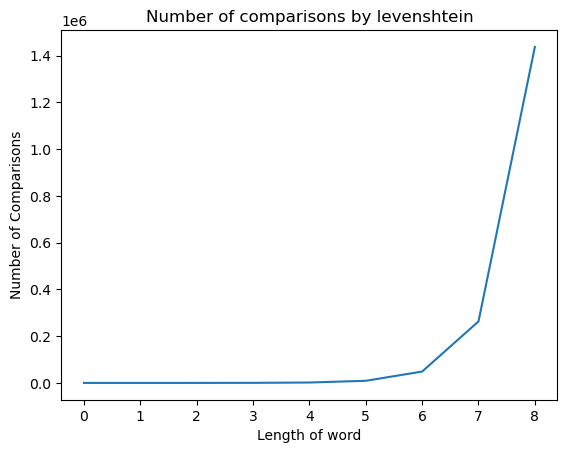

In [6]:

numComps=[]
for i in range(9):
    newStr=""
    secStr=""
    for j in range(i):
        newStr+="a"
        secStr+="b"
    print(newStr)
    print(secStr)
    levComp=levenshteinComps()
    levComp.levenshtein(newStr, secStr)
    numComps.append(levComp.comps)
    
plt.plot(numComps)
plt.ylabel("Number of Comparisons")
plt.xlabel("Length of word")
plt.title("Number of comparisons by levenshtein")
plt.show()